In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
AQ = pd.read_csv('../../data/raw/AirQualityUCI.csv', sep=";")

In [5]:
AQ

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
dc = AQ.drop(columns=["Unnamed: 15","Unnamed: 16", "NMHC(GT)"])
dc
# Dropped useless columns

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
rename = dc.rename(columns={"CO(GT)":"CO", "PT08.S1(CO)": "Tin Oxide", "NMHC(GT)": "Avg. Benzene", "PT08.S2(NMHC)": "Titania", "NOx(GT)": "Avg. NO in ppb", "PT08.S3(NOx)": "Tungsten Oxide", "NO2(GT)": "NO2", "PT08.S4(NO2)": "Hr Avg. Tungsten Oxide", "PT08.S5(O3)": "Indium Oxide" })
rename
#Renamed all of the columns

,Date,Time,CO,Tin Oxide,C6H6(GT),Titania,Avg. NO in ppb,Tungsten Oxide,NO2,Hr Avg. Tungsten Oxide,Indium Oxide,T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
cleaned_AC = rename.dropna().reset_index(drop=True)
cleaned_AC
# Dropped all of the rows with NaN's

,Date,Time,CO,Tin Oxide,C6H6(GT),Titania,Avg. NO in ppb,Tungsten Oxide,NO2,Hr Avg. Tungsten Oxide,Indium Oxide,T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,"3,1",1314.0,"13,5",1101.0,472.0,539.0,190.0,1374.0,1729.0,"21,9","29,3","0,7568"
9353,04/04/2005,11.00.00,"2,4",1163.0,"11,4",1027.0,353.0,604.0,179.0,1264.0,1269.0,"24,3","23,7","0,7119"
9354,04/04/2005,12.00.00,"2,4",1142.0,"12,4",1063.0,293.0,603.0,175.0,1241.0,1092.0,"26,9","18,3","0,6406"
9355,04/04/2005,13.00.00,"2,1",1003.0,"9,5",961.0,235.0,702.0,156.0,1041.0,770.0,"28,3","13,5","0,5139"


In [9]:
ri = cleaned_AC.reset_index(drop=True)
ri

,Date,Time,CO,Tin Oxide,C6H6(GT),Titania,Avg. NO in ppb,Tungsten Oxide,NO2,Hr Avg. Tungsten Oxide,Indium Oxide,T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,"3,1",1314.0,"13,5",1101.0,472.0,539.0,190.0,1374.0,1729.0,"21,9","29,3","0,7568"
9353,04/04/2005,11.00.00,"2,4",1163.0,"11,4",1027.0,353.0,604.0,179.0,1264.0,1269.0,"24,3","23,7","0,7119"
9354,04/04/2005,12.00.00,"2,4",1142.0,"12,4",1063.0,293.0,603.0,175.0,1241.0,1092.0,"26,9","18,3","0,6406"
9355,04/04/2005,13.00.00,"2,1",1003.0,"9,5",961.0,235.0,702.0,156.0,1041.0,770.0,"28,3","13,5","0,5139"


In [21]:
df1 = cleaned_AC.loc[:, ["Tin Oxide", "Titania", "Tungsten Oxide", "Indium Oxide", "T"]]
df1

,Tin Oxide,Titania,Tungsten Oxide,Indium Oxide,T
0,1360.0,1046.0,1056.0,1268.0,"13,6"
1,1292.0,955.0,1174.0,972.0,"13,3"
2,1402.0,939.0,1140.0,1074.0,"11,9"
3,1376.0,948.0,1092.0,1203.0,"11,0"
4,1272.0,836.0,1205.0,1110.0,"11,2"
...,...,...,...,...,...
9352,1314.0,1101.0,539.0,1729.0,"21,9"
9353,1163.0,1027.0,604.0,1269.0,"24,3"
9354,1142.0,1063.0,603.0,1092.0,"26,9"
9355,1003.0,961.0,702.0,770.0,"28,3"


In [37]:
df = df1.replace(',','.', regex=True)
df
# replaced commas separating numbers in the temp and humidity columns

,Tin Oxide,Titania,Tungsten Oxide,Indium Oxide,T
0,1360.0,1046.0,1056.0,1268.0,13.6
1,1292.0,955.0,1174.0,972.0,13.3
2,1402.0,939.0,1140.0,1074.0,11.9
3,1376.0,948.0,1092.0,1203.0,11.0
4,1272.0,836.0,1205.0,1110.0,11.2
...,...,...,...,...,...
9352,1314.0,1101.0,539.0,1729.0,21.9
9353,1163.0,1027.0,604.0,1269.0,24.3
9354,1142.0,1063.0,603.0,1092.0,26.9
9355,1003.0,961.0,702.0,770.0,28.3


## **EDA**

In [38]:
df.shape

(9357, 5)

In [39]:
df.head(5)

,Tin Oxide,Titania,Tungsten Oxide,Indium Oxide,T
0,1360.0,1046.0,1056.0,1268.0,13.6
1,1292.0,955.0,1174.0,972.0,13.3
2,1402.0,939.0,1140.0,1074.0,11.9
3,1376.0,948.0,1092.0,1203.0,11.0
4,1272.0,836.0,1205.0,1110.0,11.2


In [40]:
df.nunique(axis=0)

Tin Oxide         1042
Titania           1246
Tungsten Oxide    1222
Indium Oxide      1744
T                  437
dtype: int64

In [56]:
df.describe()

,Tin Oxide,Titania,Tungsten Oxide,Indium Oxide
count,9357.000000,9357.000000,9357.000000,9357.000000
mean,1048.990061,894.595276,794.990168,975.072032
std,329.832710,342.333252,321.993552,456.938184
min,-200.000000,-200.000000,-200.000000,-200.000000
25%,921.000000,711.000000,637.000000,700.000000
50%,1053.000000,895.000000,794.000000,942.000000
75%,1221.000000,1105.000000,960.000000,1255.000000
max,2040.000000,2214.000000,2683.000000,2523.000000


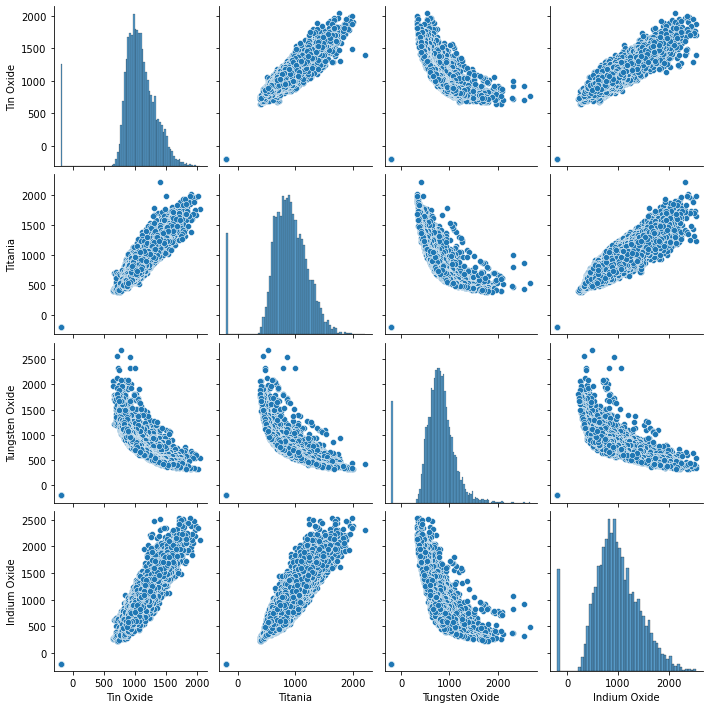

In [48]:
sns.pairplot(df)